## Exercício 2

Utilizar o dataset disponível no pacote yfinance. O objetivo é aplicar as transformações necessárias para converter a série em estacionária.

### Preparação das bibliotecas

In [12]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import yfinance as yf

# Imports para análise de dados
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [2]:
import yfinance as yf

In [3]:
# Define o código de uma das ações disponíveis cujos dados são disponibilizados pelo Yahoo Finance
tickerSymbol = 'SPY'

In [4]:
# Coleta os dados
tickerData = yf.Ticker(tickerSymbol)

In [6]:
# Obtém os valores históricos entre 2015 e 2020
tickerDf = tickerData.history(period = '1d', start = '2015-1-1', end = '2020-1-1')

In [7]:
# Gera o dataframe com os valores de fechamento das ações
tickerDf = tickerDf[['Close']]

In [8]:
# Visualiza os dados
tickerDf.head()

,Close
Date,
2015-01-02,185.07
2015-01-05,181.73
2015-01-06,180.02
2015-01-07,182.26
2015-01-08,185.49


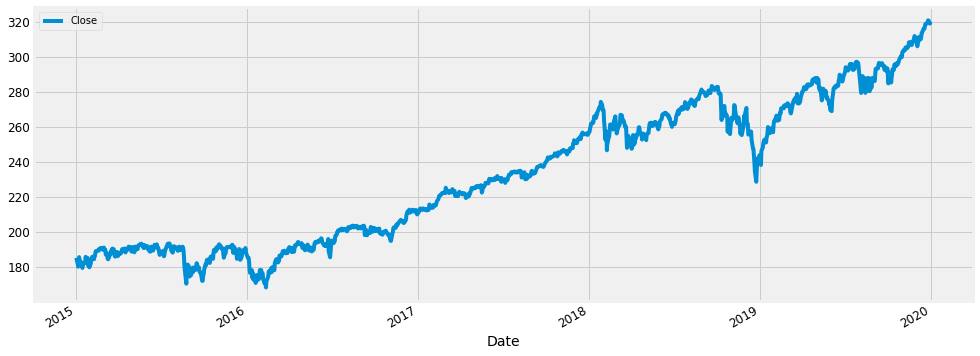

In [9]:
# Plot da série temporal
tickerDf.plot(figsize = (15, 6))
plt.show()

In [10]:
# Função para testar a estacionaridade baseado em uma média movel de 12 unidades
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

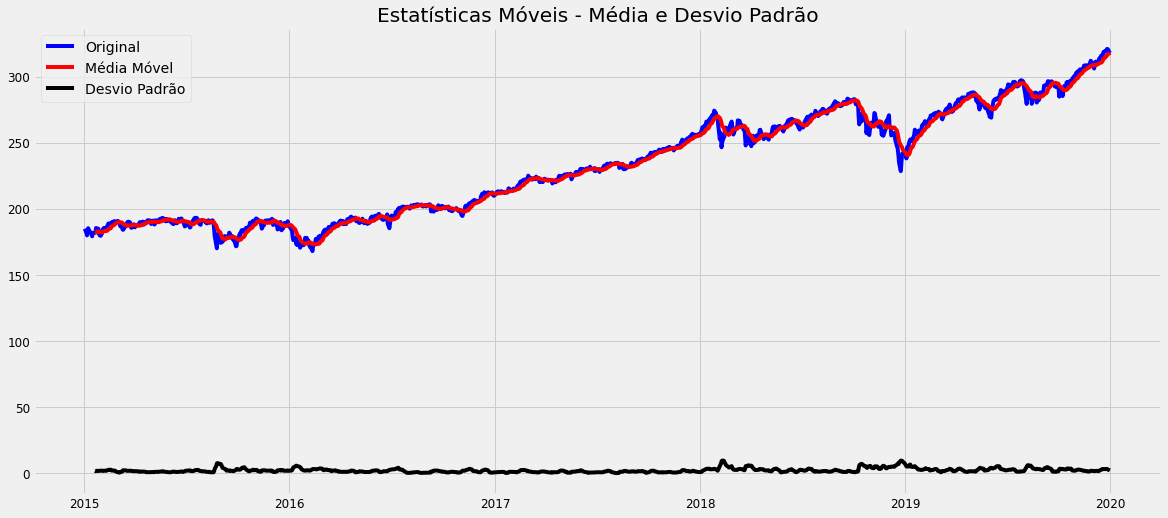


Resultado do Teste Dickey-Fuller:

Estatística do Teste               0.273850
Valor-p                            0.976112
Número de Lags Consideradas        8.000000
Número de Observações Usadas    1249.000000
Valor Crítico (1%)                -3.435596
Valor Crítico (5%)                -2.863857
Valor Crítico (10%)               -2.568004
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [13]:
testa_estacionaridade(tickerDf.Close)

### A série possui Tendência de crescimento e aparenta não possuir sazonalidade baseado em fenômenos que se repetem.

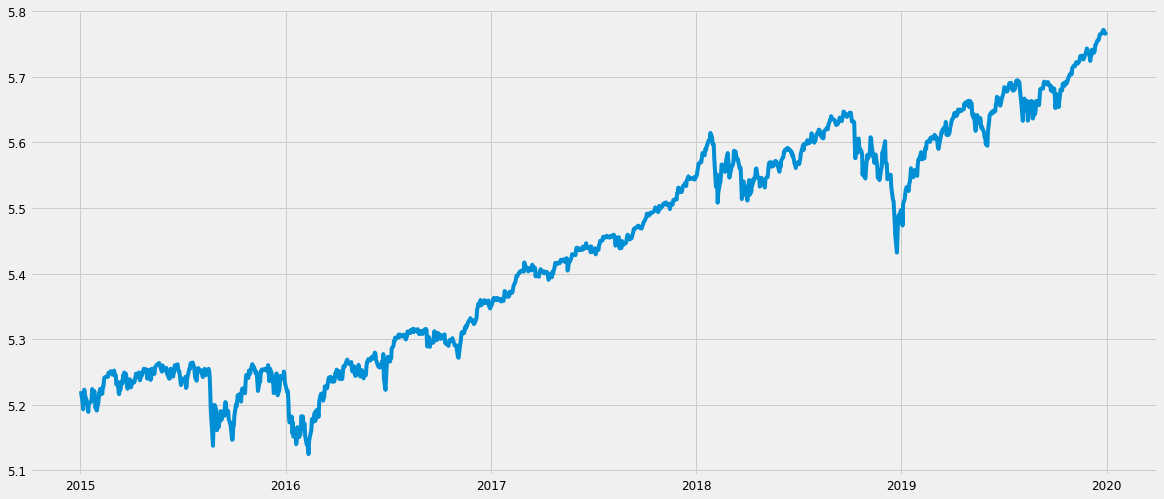

In [14]:
# Aplicando a Transformação de log
tickerDF_Log = np.log(tickerDf)
plt.plot(tickerDF_Log)

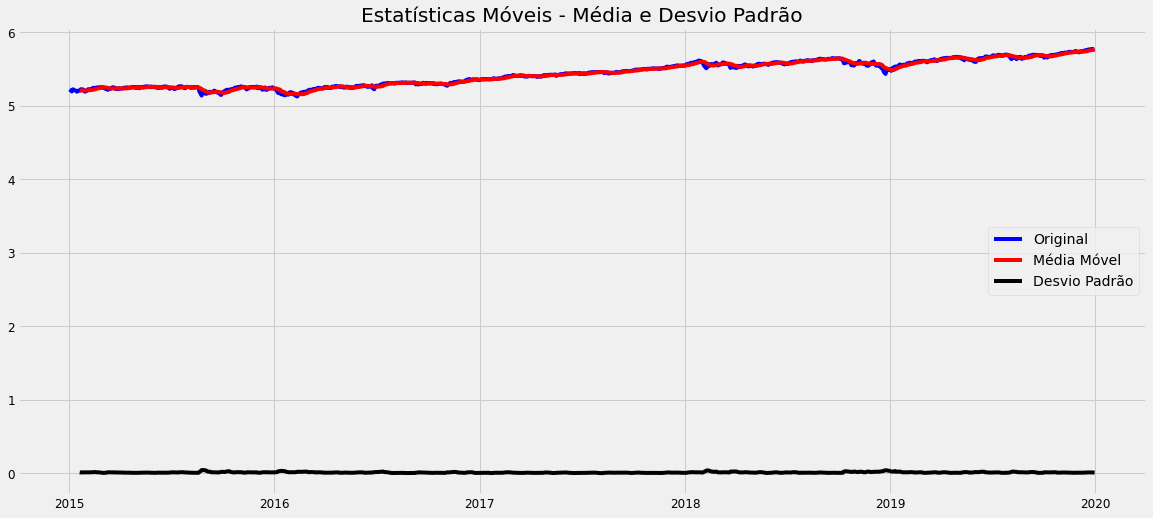


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -0.242084
Valor-p                            0.933316
Número de Lags Consideradas        0.000000
Número de Observações Usadas    1257.000000
Valor Crítico (1%)                -3.435563
Valor Crítico (5%)                -2.863842
Valor Crítico (10%)               -2.567996
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [15]:
# Vamos testar a estacionaridade da série após a transformação de log
testa_estacionaridade(tickerDF_Log.Close)

A transformação de log não foi suficiente para converter a série em estacionária.

### Aplicando técnicas de Diferenciação para tentar tornar a série em uma série Estacionária.

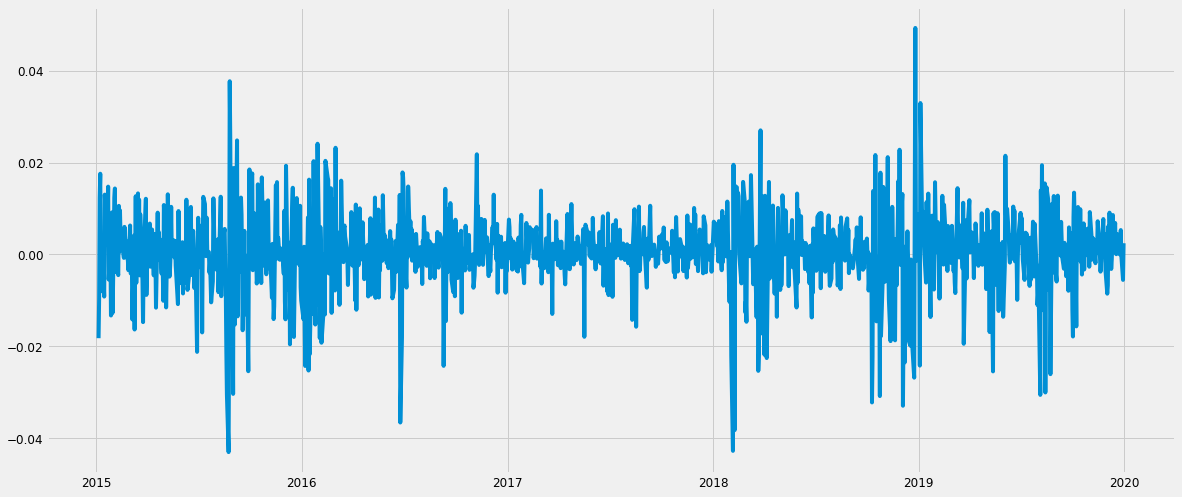

In [16]:
# Diferenciação Para Remover Tendência
# O método shift() move os dados e uma unidade
# Observe que estamos usando a série com transformação de log
tickerDF_Log_diff = tickerDF_Log.Close - tickerDF_Log.Close.shift()
plt.plot(tickerDF_Log_diff)

In [17]:
# Vamos testar a estacionaridade da série após a diferenciação para remover a tendência
tickerDF_Log_diff_df = pd.DataFrame(tickerDF_Log_diff)
tickerDF_Log_diff_df

,Close
Date,
2015-01-02,NaN
2015-01-05,-0.018212
2015-01-06,-0.009454
2015-01-07,0.012366
2015-01-08,0.017567
...,...
2019-12-24,0.000031
2019-12-26,0.005309
2019-12-27,-0.000249


In [18]:
# Vamos remover os valores NA para testar a estacionaridade
tickerDF_Log_diff_df.dropna(inplace = True)

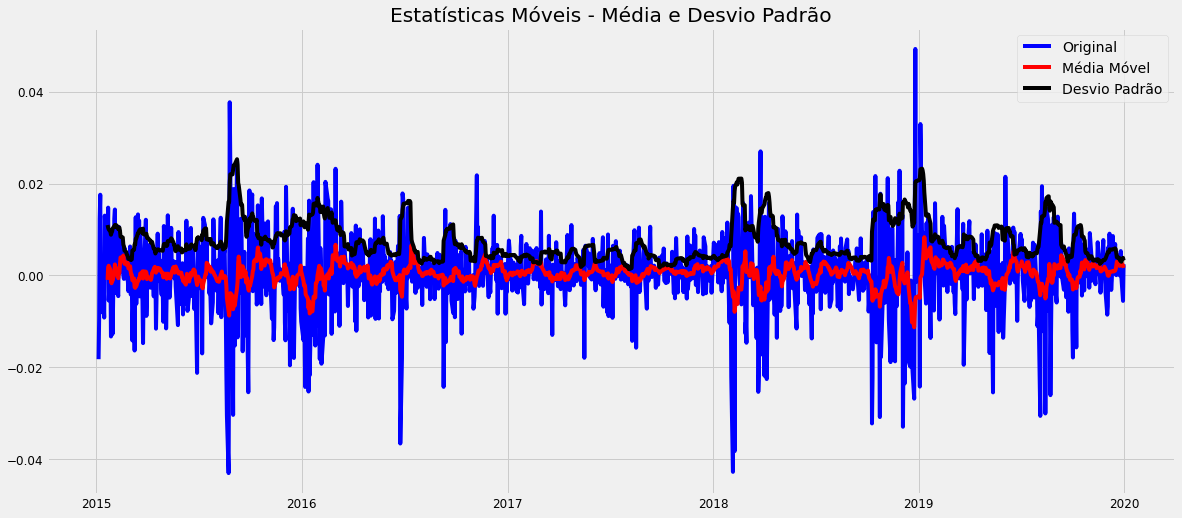


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -26.786018
Valor-p                            0.000000
Número de Lags Consideradas        1.000000
Número de Observações Usadas    1255.000000
Valor Crítico (1%)                -3.435571
Valor Crítico (5%)                -2.863846
Valor Crítico (10%)               -2.567998
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [19]:
testa_estacionaridade(tickerDF_Log_diff_df.Close)

# Conseguimos obter uma série estacionária após a aplicação da técnica de diferenciação.